# Brain Tumor Classification - Model Comparison

This notebook compares the baseline model explored in the previous section with more advanced models including using CNNs with residual connections, and using Vision Transformers.

## Setup and Imports

In [1]:
import os
import pickle
import matplotlib.pyplot as plt
from src.utils.visualization import plot_accuracy_results
from src.utils.prediction import analyze_predictions
import numpy as  np

def load_history(history_filename, results_dir='../results'):
    """
    Load only the training history.

    Args:
        history_filename: Name of the history file (e.g., 'cnn_history_10_epochs.pkl')
        results_dir: Directory where the history is saved

    Returns:
        history: Loaded training history dictionary
    """
    history_path = os.path.join(results_dir, history_filename)
    with open(history_path, 'rb') as f:
        history = pickle.load(f)

    return history

# Let's load the model histories. These are the model types we have run analysis for:

### 1. CNN (Baseline)

- A simple Convolutional Neural Network (CNN) architecture.
- Composed of 4 convolutional blocks (Conv → BatchNorm → LeakyReLU → MaxPool) followed by two fully connected layers.
- Lightweight, fast to train, and serves as the baseline model for comparison.

---

### 2. CNN with Residual Connections (CNN Res)

- A modified version of the baseline CNN with added residual blocks.
- Helps the model learn better feature representations by allowing information to flow through skip connections.
- Residual connections mitigate the risk of vanishing gradients, especially as the network depth increases.

---

### 3. CNN with Topological Features (CNN Topo)

- Extends the baseline CNN by incorporating topological data analysis (TDA) features.
- Persistence images are extracted from the input and fed alongside the convolutional features.
- Aims to capture additional structural information from the MRI data that pure CNNs might miss.

---

### 4. Vision Transformer (ViT)

- A pre-trained Vision Transformer model (`vit_base_patch16_224`) adapted for the classification task.
- Transformers typically require large datasets; using a pre-trained model helps avoid overfitting on the smaller MRI dataset.
- Only the classification head is retrained, while the transformer backbone remains frozen.

---

### 5. Fine-tuned Vision Transformer (ViT-FT)

- Builds upon the pre-trained Vision Transformer.
- Fine-tunes only the last Transformer block (`blocks.11`), the normalization layers, and the classification head.
- Fine-tuning allows the model to better specialize to the brain MRI dataset without the computational cost of training all layers.
- Helps leverage pre-trained knowledge while adapting to the specific characteristics of the brain tumor classification task.




In [2]:
# Example usage
num_epochs = 1  # Change this depending on what you want to load

# Load histories
cnn_history = load_history(f'cnn_history_{num_epochs}_epochs.pkl')
cnn_res_history = load_history(f'cnn_res_history_{num_epochs}_epochs.pkl')
# cnn_topo_history = load_history(f'cnn_topo_history_{num_epochs}_epochs.pkl')
# vit_history = load_history(f'vit_history_{num_epochs}_epochs.pkl')
# vit_ft_history = load_history(f'vit_ft_history_{num_epochs}_epochs.pkl')

In [3]:
# --- Mean epoch times ---

# CNN
cnn_epoch_times = cnn_history['epoch_times']
print(f"CNN mean epoch time: {np.mean(cnn_epoch_times):.2f} seconds")

# CNN with Residual Blocks
cnn_res_epoch_times = cnn_res_history['epoch_times']
print(f"CNN Res mean epoch time: {np.mean(cnn_res_epoch_times):.2f} seconds")

# # CNN with Topological Features
# cnn_topo_epoch_times = cnn_topo_history['epoch_times']
# print(f"CNN Topo mean epoch time: {np.mean(cnn_topo_epoch_times):.2f} seconds")

# # Vision Transformer (ViT)
# vit_epoch_times = vit_history['epoch_times']
# print(f"ViT mean epoch time: {np.mean(vit_epoch_times):.2f} seconds")

# # Fine-tuned Vision Transformer (ViT-FT)
# vit_ft_epoch_times = vit_ft_history['epoch_times']
# print(f"Fine-tuned ViT mean epoch time: {np.mean(vit_ft_epoch_times):.2f} seconds")

CNN mean epoch time: 165.05 seconds
CNN Res mean epoch time: 226.24 seconds


In [4]:
# CNN
analyze_predictions(cnn_history['all_predictions'], cnn_history['all_true_labels'], model_name="CNN")

# CNN with Residual Blocks
analyze_predictions(cnn_res_history['all_predictions'], cnn_res_history['all_true_labels'], model_name="CNN Res")

# # CNN with Topological Features
# analyze_predictions(cnn_topo_history['all_predictions'], cnn_topo_history['all_true_labels'], model_name="CNN Topo")

# # Vision Transformer (ViT)
# analyze_predictions(vit_history['all_predictions'], vit_history['all_true_labels'], model_name="ViT")

# # Fine-tuned Vision Transformer (ViT-FT)
# analyze_predictions(vit_ft_history['all_predictions'], vit_ft_history['all_true_labels'], model_name="Fine-tuned ViT")


Analyzing predictions for: CNN
Epoch 1 Prediction Counts: Counter({2: 377, 0: 372, 1: 287, 3: 169})

Overall Prediction Counts Across All Epochs: Counter({2: 377, 0: 372, 1: 287, 3: 169})
Overall Accuracy Across All Epochs: 71.12%



Analyzing predictions for: CNN Res
Epoch 1 Prediction Counts: Counter({2: 358, 0: 296, 3: 289, 1: 262})

Overall Prediction Counts Across All Epochs: Counter({2: 358, 0: 296, 3: 289, 1: 262})
Overall Accuracy Across All Epochs: 76.76%




## Plot accuracies of models

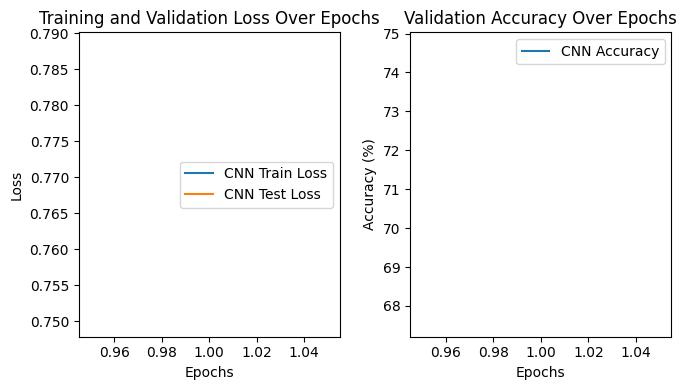

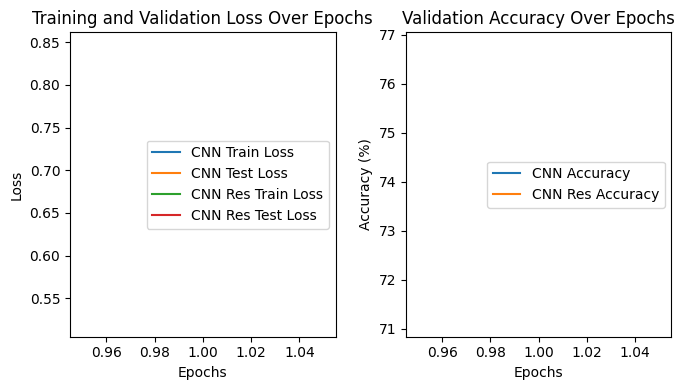

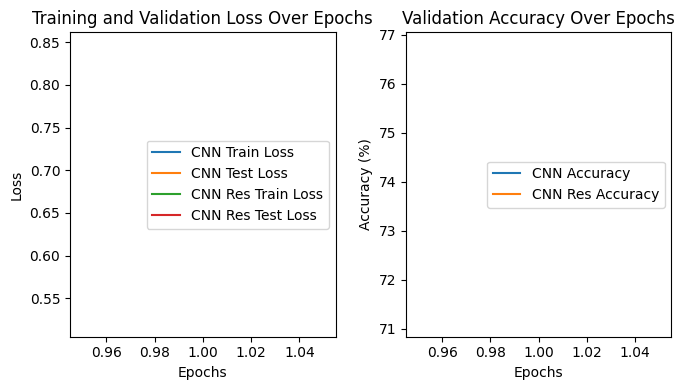

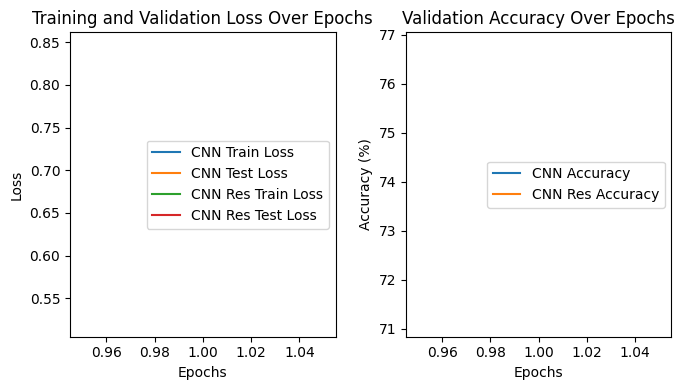

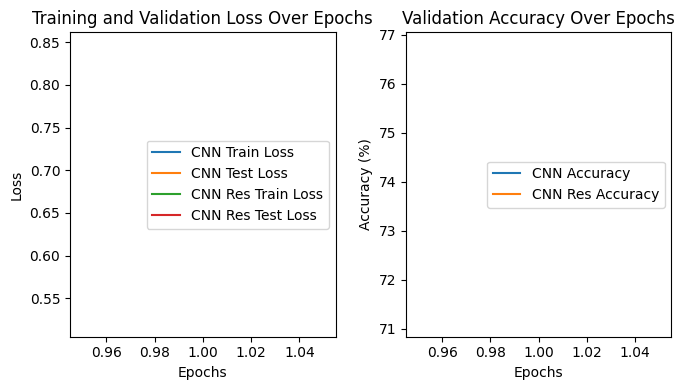

In [5]:
# CNN history
cnn_train_loss = cnn_history['train_loss_list']
cnn_test_loss = cnn_history['test_loss_list']
cnn_accuracy = cnn_history['accuracy_list']

# CNN-Res history
cnn_res_train_loss = cnn_res_history['train_loss_list']
cnn_res_test_loss = cnn_res_history['test_loss_list']
cnn_res_accuracy = cnn_res_history['accuracy_list']

# # CNN-Topo history
# cnn_topo_train_loss = cnn_topo_history['train_loss_list']
# cnn_topo_test_loss = cnn_topo_history['test_loss_list']
# cnn_topo_accuracy = cnn_topo_history['accuracy_list']

# # ViT history
# vit_train_loss = vit_history['train_loss_list']
# vit_test_loss = vit_history['test_loss_list']
# vit_accuracy = vit_history['accuracy_list']

# # ViT-Fine-Tuned history
# vit_ft_train_loss = vit_ft_history['train_loss_list']
# vit_ft_test_loss = vit_ft_history['test_loss_list']
# vit_ft_accuracy = vit_ft_history['accuracy_list']

# --- Now plotting ---

# Figure 1: Plot only CNN
fig1, (ax1_1, ax2_1) = plt.subplots(1, 2, figsize=(7, 4))
plot_accuracy_results(cnn_train_loss, cnn_test_loss, cnn_accuracy, "CNN", ax1_1, ax2_1)
plt.tight_layout()
plt.show()

# Figure 2: Plot CNN and CNN with Residual Blocks
fig2, (ax1_2, ax2_2) = plt.subplots(1, 2, figsize=(7, 4))
plot_accuracy_results(cnn_train_loss, cnn_test_loss, cnn_accuracy, "CNN", ax1_2, ax2_2)
plot_accuracy_results(cnn_res_train_loss, cnn_res_test_loss, cnn_res_accuracy, "CNN Res", ax1_2, ax2_2)
plt.tight_layout()
plt.show()

# Figure 3: Plot CNN, CNN with Residual Blocks, and CNN Topo
fig3, (ax1_3, ax2_3) = plt.subplots(1, 2, figsize=(7, 4))
plot_accuracy_results(cnn_train_loss, cnn_test_loss, cnn_accuracy, "CNN", ax1_3, ax2_3)
plot_accuracy_results(cnn_res_train_loss, cnn_res_test_loss, cnn_res_accuracy, "CNN Res", ax1_3, ax2_3)
# plot_accuracy_results(cnn_topo_train_loss, cnn_topo_test_loss, cnn_topo_accuracy, "CNN Topo", ax1_3, ax2_3)
plt.tight_layout()
plt.show()

# Figure 4: Plot CNN, CNN with Residual Blocks, CNN Topo, and ViT
fig4, (ax1_4, ax2_4) = plt.subplots(1, 2, figsize=(7, 4))
plot_accuracy_results(cnn_train_loss, cnn_test_loss, cnn_accuracy, "CNN", ax1_4, ax2_4)
plot_accuracy_results(cnn_res_train_loss, cnn_res_test_loss, cnn_res_accuracy, "CNN Res", ax1_4, ax2_4)
# plot_accuracy_results(cnn_topo_train_loss, cnn_topo_test_loss, cnn_topo_accuracy, "CNN Topo", ax1_4, ax2_4)
# plot_accuracy_results(vit_train_loss, vit_test_loss, vit_accuracy, "ViT", ax1_4, ax2_4)
plt.tight_layout()
plt.show()

# Figure 5: Plot CNN, CNN with Residual Blocks, CNN Topo, ViT, and Fine-tuned ViT
fig5, (ax1_5, ax2_5) = plt.subplots(1, 2, figsize=(7, 4))
plot_accuracy_results(cnn_train_loss, cnn_test_loss, cnn_accuracy, "CNN", ax1_5, ax2_5)
plot_accuracy_results(cnn_res_train_loss, cnn_res_test_loss, cnn_res_accuracy, "CNN Res", ax1_5, ax2_5)
# plot_accuracy_results(cnn_topo_train_loss, cnn_topo_test_loss, cnn_topo_accuracy, "CNN Topo", ax1_5, ax2_5)
# plot_accuracy_results(vit_train_loss, vit_test_loss, vit_accuracy, "ViT", ax1_5, ax2_5)
# plot_accuracy_results(vit_ft_train_loss, vit_ft_test_loss, vit_ft_accuracy, "Fine-tuned ViT", ax1_5, ax2_5)
plt.tight_layout()
plt.show()